# 🏘️ **Exploratory Data Analysis Project for California Housing Values (California Housing EDA)**

📝 **Project Readme**

📌 **Problem Statement**

The core problem is to **predict the median house value** ($\text{median\_house\_value}$) **across different districts in California**. Accurate real estate valuation is crucial for investment firms, banks (for mortgage appraisal), and government policymakers.

**The Challenge:** The difficulty lies in the fact that house value is influenced by multiple complex and inter-related factors, including **income, geographical location** (proximity to the coast), house age, and population density in the area. We need a **deep data analysis** to understand which of these features is the **most impactful** on price before building any prediction model.

🏛️ **Professional Project Structure**

This project is organized into **four professional analytical phases** to ensure comprehensive coverage of all data aspects:

**Data Setup & Quality Check:**** To ensure data integrity and discover initial problems.

**Cleaning & Feature Engineering:** To address missing values and generate useful relative measures.

**Statistical & Distribution Analysis:** To understand the shape of each feature (skewness and concentrations).

**Deep Relationship & Geographic Viz:** To measure correlations and visually determine the main influencing factors.

💡 **How EDA Contributes to Solving the Problem**

The statistical analysis and visualizations performed provided **direct insights and solutions** to the problem:

**Identified Strongest Factor:** Correlation analysis (Heatmap) revealed that **median income** (median_income) is the **most significant and positive factor** in determining house value **(very strong correlation)**.

**Data Quality Handling:** Missing values in total_bedrooms were identified and handled using the **Median**, which is the most suitable solution due to its resistance to **outliers**.

**Capping Discovery:** The critical issue of **Maximum Value Capping** in median_house_value (at **$500,001**) was discovered. This information is vital, as it indicates that any future prediction model will be **unable to predict values above this ceiling**, and its apparent performance might be **misleading**.

**Understood Geographic Impact:** Geographic visualization showed that **location** (proximity to the coast) leads to a **significant increase in prices**.

# Load the datasets and import the library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure environment and professional styles
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Load the data
try:
    HOUSING_PATH = "/kaggle/input/california-housing-prices/housing.csv"
    df = pd.read_csv(HOUSING_PATH).copy()
except FileNotFoundError:
    print("❌ Error: 'housing.csv' file not found.")
    exit()



# Data Setup & Quality Check

In [2]:
# 1 Check Structure and Data Types
print("info Summary (Data Types and Non-Null Values):\n")
df.info()

info Summary (Data Types and Non-Null Values):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
# 2 Descriptive Statistics (To detect range and potential outliers)
print("\nComprehensive Descriptive Statistics:")
print(df.describe().T)


Comprehensive Descriptive Statistics:
                      count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_

In [4]:
# 3 Analyze Missing Values and Categorical Data
print("\nTotal Missing Values per column:")
print(df.isnull().sum())
print("\nDistribution of ocean_proximity values:")
print(df["ocean_proximity"].value_counts())


Total Missing Values per column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Distribution of ocean_proximity values:
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


# Cleaning & Feature Engineering

In [5]:
# 1 Handle Missing Values (Median Imputation is the most robust solution)
# Median is used as it resists outliers often found in housing data.
missing_count = df['total_bedrooms'].isnull().sum()
if missing_count > 0:
    median_val = df['total_bedrooms'].median()
    df['total_bedrooms'].fillna(median_val, inplace=True)
    print(f"✅ {missing_count} missing values in 'total_bedrooms' filled with the Median.")

✅ 207 missing values in 'total_bedrooms' filled with the Median.


In [6]:
# 2 Generate New Complex Features
# Creating relative metrics (ratios) that are more insightful than absolute totals.
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

print("✅ New complex (ratio) features generated successfully.")

✅ New complex (ratio) features generated successfully.


#  Statistical & Distribution Analysis

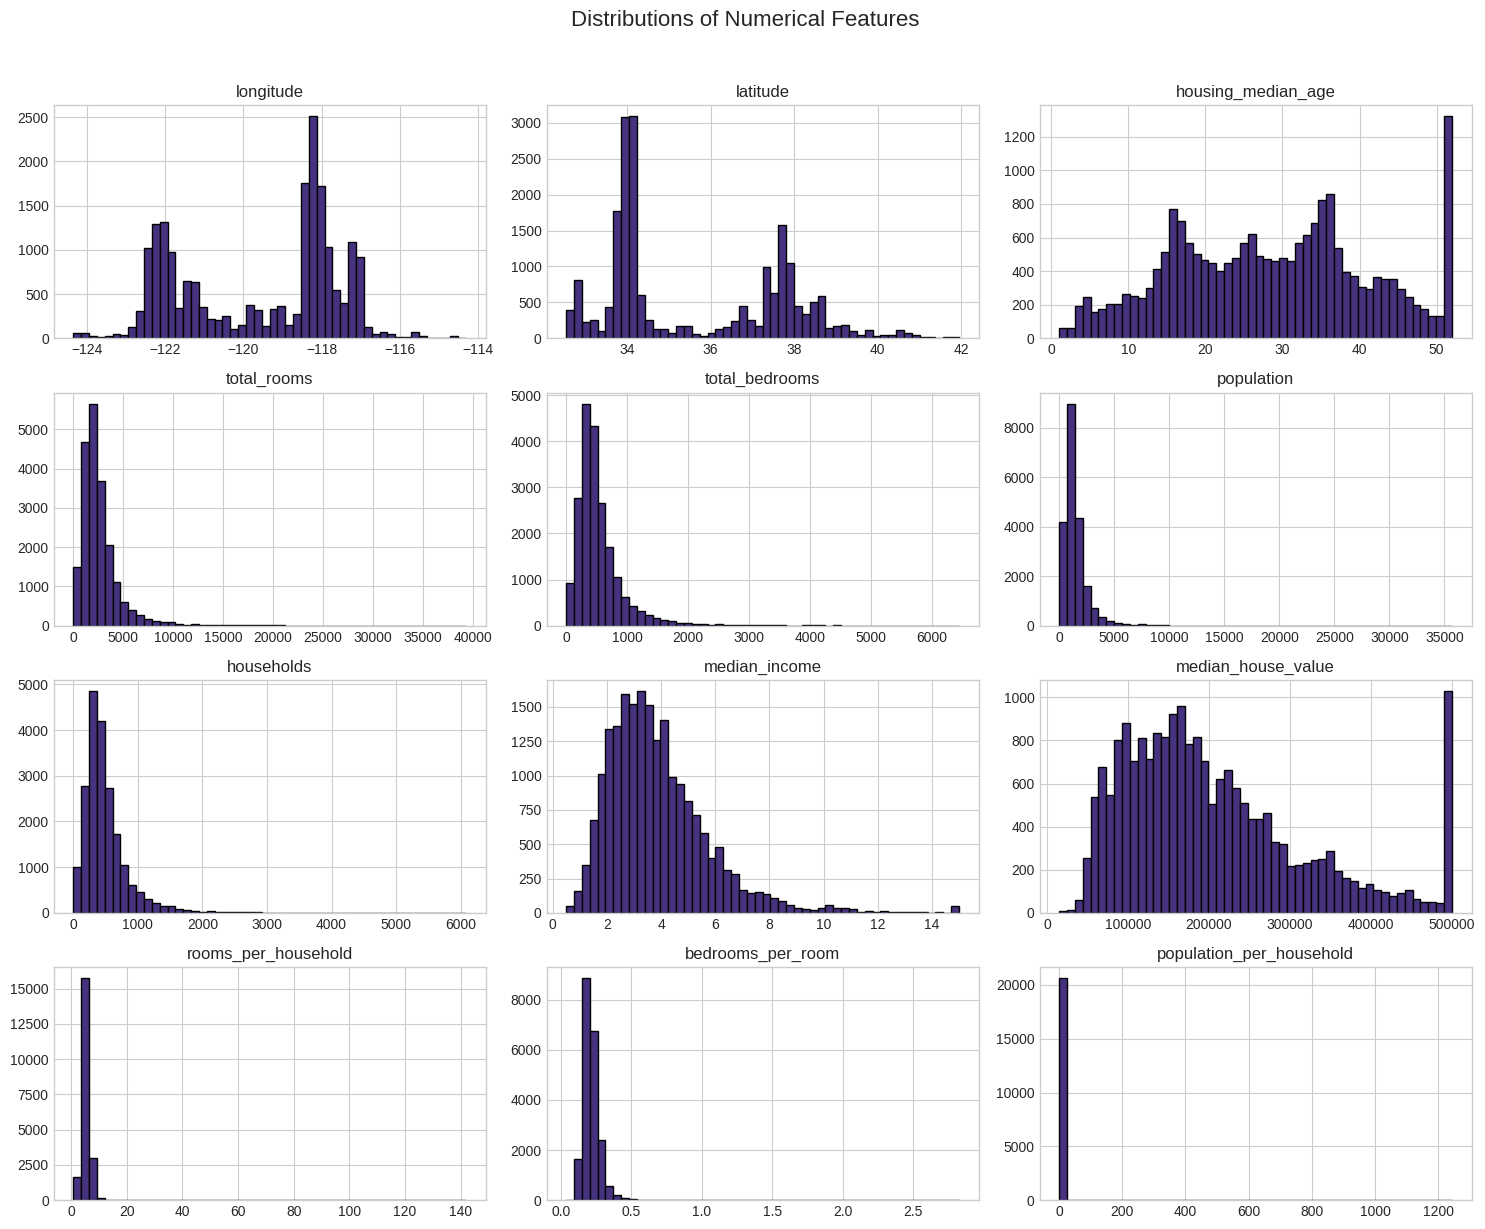

In [7]:
# 1 Individual Feature Distributions (Histograms)
# Revealing skewness and concentrations in features after feature engineering.
df.hist(bins=50, figsize=(15, 12), edgecolor='black')
plt.suptitle('Distributions of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

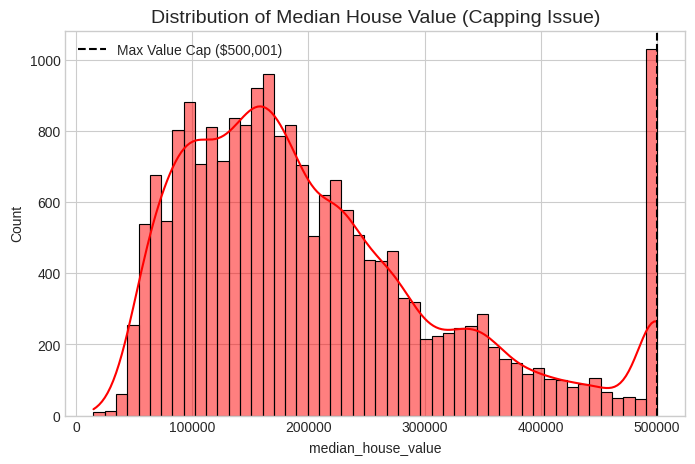

In [8]:
# 2 Target Variable Distribution Analysis
# Detecting the critical Capping issue at $500,001.
plt.figure(figsize=(8, 5))
sns.histplot(df['median_house_value'], bins=50, kde=True, color='red')
plt.title('Distribution of Median House Value (Capping Issue)', fontsize=14)
plt.axvline(500001, color='black', linestyle='--', label='Max Value Cap ($500,001)')
plt.legend()
plt.show()

# Deep Relationship & Geographic Viz

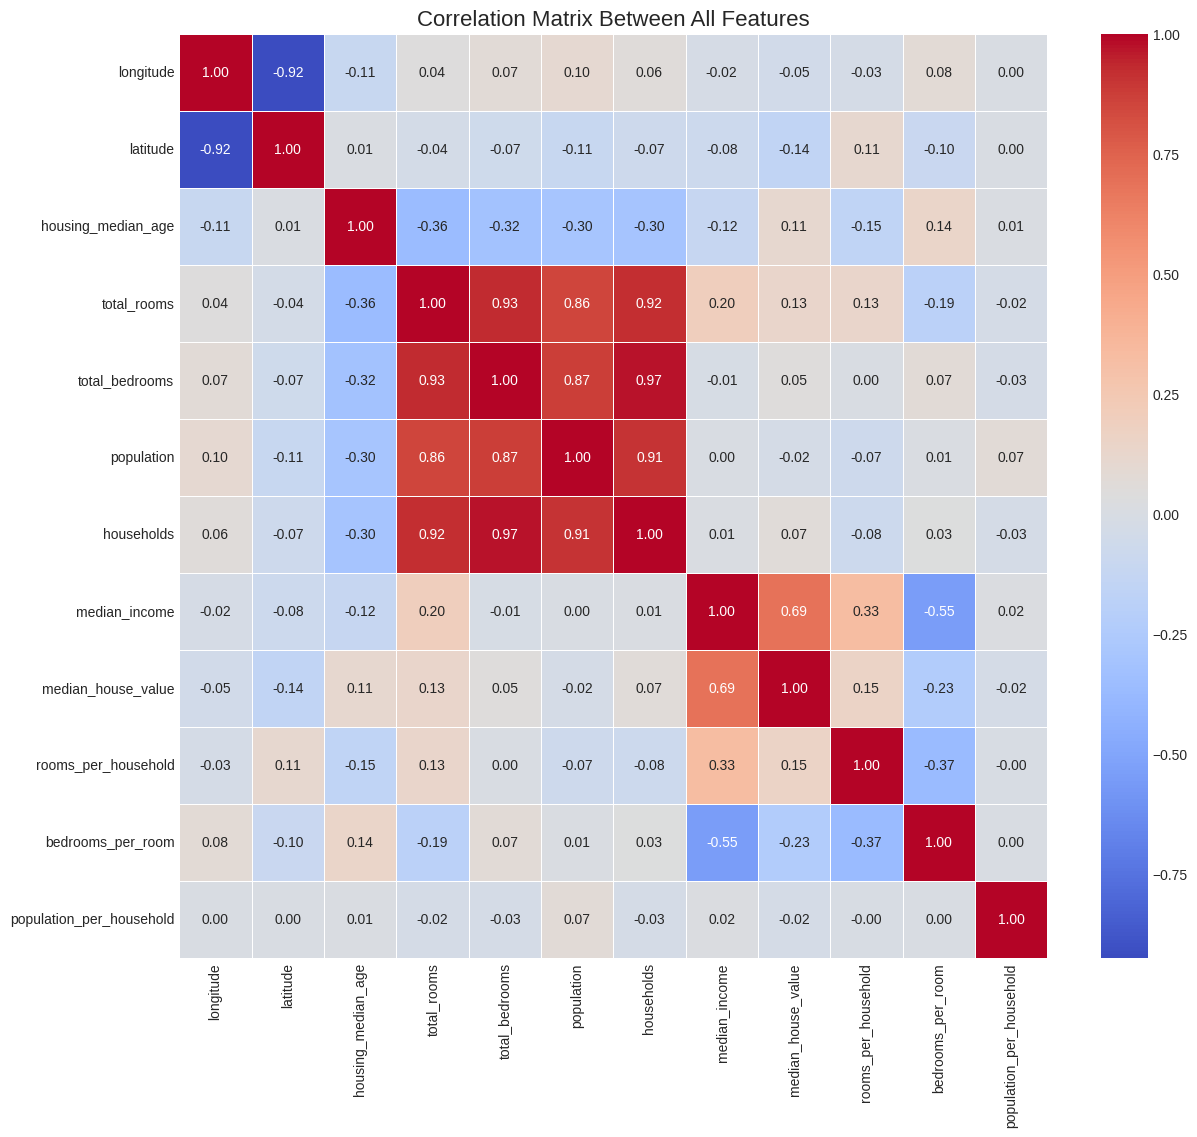

In [9]:
# 1 Correlation Analysis (Heatmap)
# Measuring and visualizing the strength of correlation between all features.
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5)
plt.title('Correlation Matrix Between All Features', fontsize=16)
plt.show()

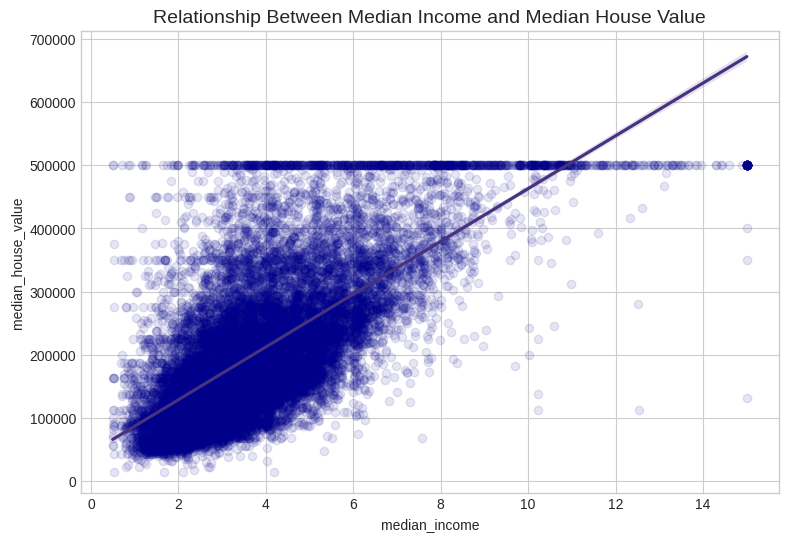

In [10]:
# 2 Linear Relationship Analysis (Scatter Plot)
# Revealing the strong, linear relationship between income and house value.
plt.figure(figsize=(9, 6))
sns.regplot(x='median_income', y='median_house_value', data=df,
            scatter_kws={'alpha': 0.1, 'color': 'darkblue'})
plt.title('Relationship Between Median Income and Median House Value', fontsize=14)
plt.show()

<Figure size 1200x1000 with 0 Axes>

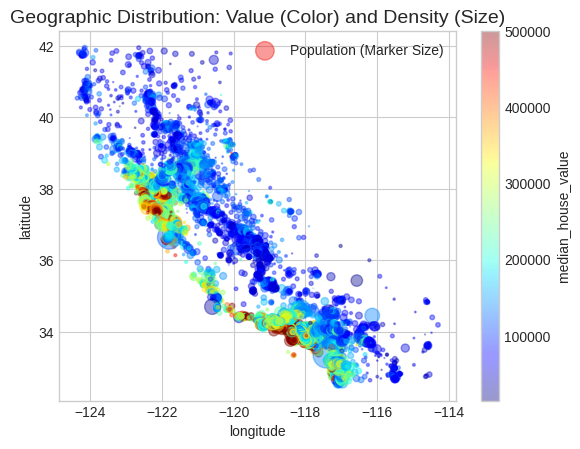

In [11]:
# 3 Geographic Visualization of Value and Density
# Showing how location (latitude/longitude) and population density influence prices.
plt.figure(figsize=(12, 10))
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=df["population"]/100, label="Population (Marker Size)",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.title('Geographic Distribution: Value (Color) and Density (Size)', fontsize=14)
plt.legend()
plt.show()

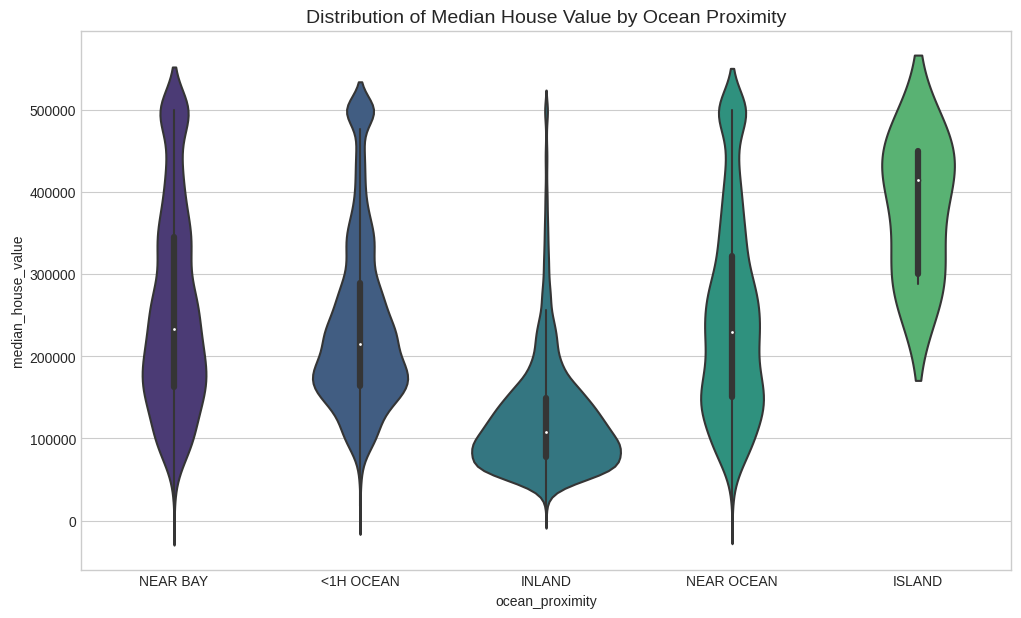

In [12]:
# 4 Categorical Feature Analysis (Violin Plot)
# Revealing the full distribution of the target variable within each ocean proximity category.
plt.figure(figsize=(12, 7))
sns.violinplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('Distribution of Median House Value by Ocean Proximity', fontsize=14)
plt.show()